In [1]:
import pandas as pd 

In [2]:
titanic_train = pd.read_csv("/home/shruti/Downloads/train.csv")

In [3]:
titanic_test = pd.read_csv("/home/shruti/Downloads/test.csv")

In [5]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
titanic_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
titanic_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


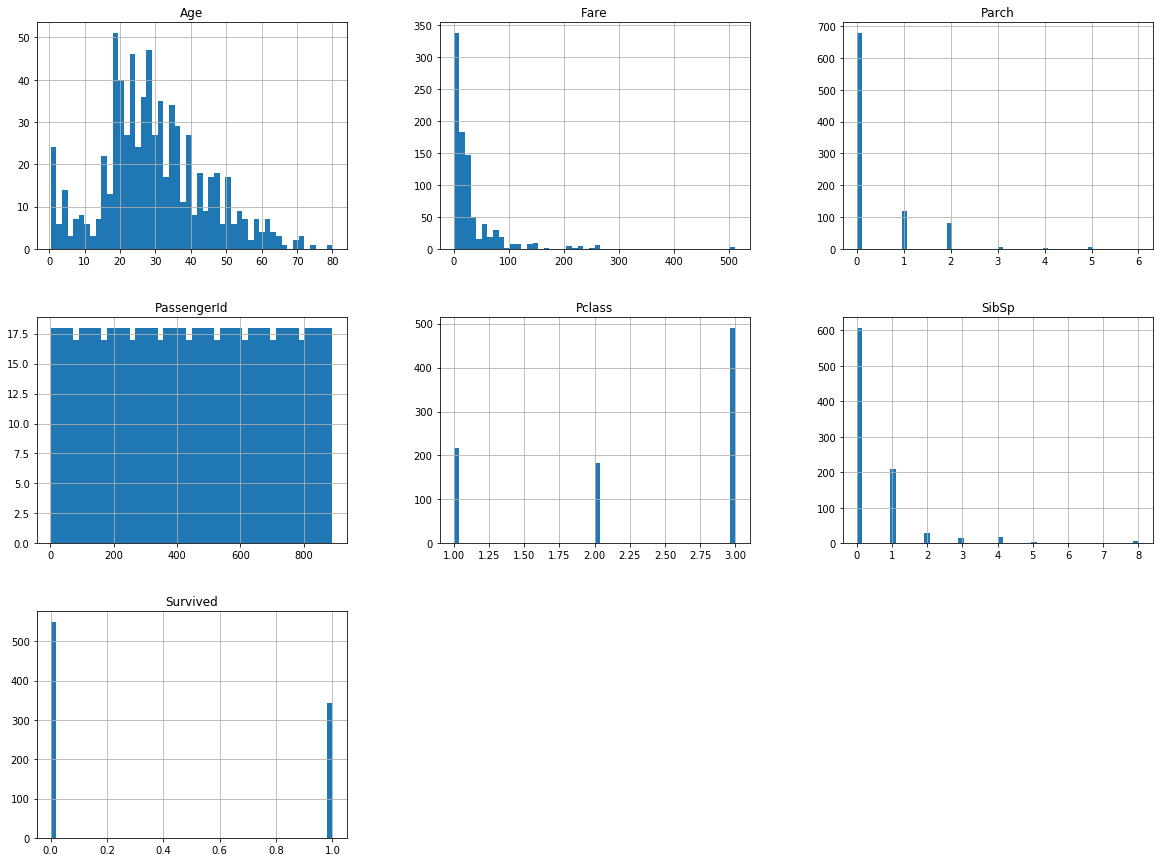

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic_train.hist(bins=50,figsize=(20,15))
plt.show()

In [20]:
corr_matrix = titanic_train.corr()

In [22]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [24]:
from pandas.tools.plotting import scatter_matrix

In [25]:
attributes = ["Survived","Fare","Pclass"]

/home/shruti/ml/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42130f62b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f42134f6780>]], dtype=object)

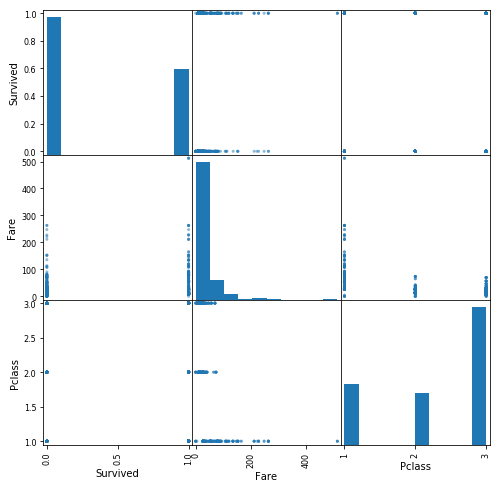

In [28]:
scatter_matrix(titanic_train[attributes],figsize=(8,8))

In [52]:
titanic_train["Fare_per_Age"]=titanic_train["Fare"]/titanic_train["Age"]
titanic_train["Fare_per_Pclass"]=titanic_train["Fare"]/titanic_train["Pclass"]
titanic_train["Age_and_SibSp"]=titanic_train["Age"]*titanic_train["SibSp"]

In [53]:
corr_matrix = titanic_train.corr()

In [54]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived           1.000000
Fare_per_Pclass    0.267627
Fare               0.257307
Fare_per_Parch     0.145439
Fare_per_Age       0.138080
Parch              0.081629
Age_and_SibSp      0.058466
PassengerId       -0.005007
Parch_per_SibSp   -0.007132
SibSp             -0.035322
Age_per_Parch     -0.049141
Age               -0.077221
Pclass            -0.338481
Name: Survived, dtype: float64

In [55]:
titanic = titanic_train.drop("Survived",axis=1)

In [57]:
titanic_labels = titanic_train["Survived"].copy()

In [58]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_per_Age,Fare_per_Pclass,Parch_per_SibSp,Age_per_Parch,Fare_per_Parch,Age_and_SibSp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.329545,2.416667,0.0,inf,inf,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.875876,71.283300,0.0,inf,inf,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.304808,2.641667,NaN,inf,inf,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.517143,53.100000,0.0,inf,inf,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.230000,2.683333,NaN,inf,inf,0.0


In [59]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values
    

In [156]:
tt = DataFrameSelector(num_attribs)
tt = tt.fit_transform(titanic_train)
imputer= Imputer(strategy = "median")
tt = imputer.fit_transform(tt)
com_attribs = CombinedAttributesAdder() 
tt=com_attribs.fit_transform(tt)
std_scale = StandardScaler()
std_scale.fit_transform(tt)
ll = LabelEncoder()
titanic_train["Embarked"].fillna("S",inplace=True)
ll.fit_transform(titanic_train["Sex"])

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0,

In [135]:
fare_ix, pclass_ix, parch_ix, age_ix = 4, 0, 3, 1
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        ror=[]
        for val in X[:,parch_ix]:
            if val == 0:
                ror.append(0.00000001)
            else:
                ror.append(val)
        Fare_per_Pclass = X[:,fare_ix]/X[:,pclass_ix]
        Fare_per_Parch= X[:,fare_ix]/ror
        Fare_per_Age=X[:,fare_ix]/X[:,age_ix]
        return np.c_[X, Fare_per_Pclass, Fare_per_Parch,Fare_per_Age]

In [176]:
from sklearn.preprocessing import LabelEncoder
class LabelBinarizer_new(TransformerMixin, BaseEstimator):
    def fit(self, X, y = 0):
        self.encoder = None
        return self
    def transform(self, X, y = 0):
        if(self.encoder is None):
            print("Initializing encoder")
            self.encoder = LabelBinarizer();
            result = self.encoder.fit_transform(X)
        else:
            result = self.encoder.transform(X)
        return result;    

In [63]:
from sklearn.preprocessing import Imputer, StandardScaler

In [183]:
num_attribs = ["Pclass","Age","SibSp","Parch","Fare"]
cat_attribs = ["Sex"]

In [65]:
titanic = pd.read_csv("/home/shruti/Downloads/train.csv")

In [66]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
titanic_train = titanic.drop(["PassengerId","Name","Ticket","Cabin","Survived"],axis=1)
titanic_labels = titanic["Survived"].copy()

In [84]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [187]:
#titanic_train["Parch"].value_counts()
ll = LabelBinarizer_new()
ll.fit_transform(titanic_train["Sex"])

Initializing encoder


array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [87]:
from sklearn.pipeline import Pipeline

In [140]:
num_pipeline = Pipeline([('selector',DataFrameSelector(num_attribs)),('imputer',Imputer(strategy = "median")),('attribs_adder',CombinedAttributesAdder()),('std_scaler',StandardScaler()),])

In [177]:
cat_pipeline = Pipeline([('selector',DataFrameSelector(cat_attribs)),('label_binarizer',LabelBinarizer_new())])

In [178]:
from sklearn.pipeline import FeatureUnion

In [179]:
full_pipeline = FeatureUnion(transformer_list=[("num_pipeline",num_pipeline),("cat_pipeline",cat_pipeline)])

In [269]:
titanic_prepared = num_pipeline.fit_transform(titanic_train)
titanic_prepared =np.hstack([titanic_prepared,ll.fit_transform(titanic_train["Sex"])])
titanic_prepared =np.hstack([titanic_prepared,ll.fit_transform(titanic_train["Embarked"])])
titanic_prepared.shape

Initializing encoder
Initializing encoder


(891, 12)

In [104]:
titanic_train["Fare"]/titanic_train["Pclass"]

0        2.416667
1       71.283300
2        2.641667
3       53.100000
4        2.683333
5        2.819433
6       51.862500
7        7.025000
8        3.711100
9       15.035400
10       5.566667
11      26.550000
12       2.683333
13      10.425000
14       2.618067
15       8.000000
16       9.708333
17       6.500000
18       6.000000
19       2.408333
20      13.000000
21       6.500000
22       2.676400
23      35.500000
24       7.025000
25      10.462500
26       2.408333
27     263.000000
28       2.626400
29       2.631933
          ...    
861      5.750000
862     25.929200
863     23.183333
864      6.500000
865      6.500000
866      6.929150
867     50.495800
868      3.166667
869      3.711100
870      2.631933
871     52.554200
872      5.000000
873      3.000000
874     12.000000
875      2.408333
876      3.281933
877      2.631933
878      2.631933
879     83.158300
880     13.000000
881      2.631933
882      3.505567
883      5.250000
884      2.350000
885      9

In [107]:
import numpy as np

In [198]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)

In [199]:
sgd_clf.fit(titanic_prepared,titanic_labels)

/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [200]:
from sklearn.model_selection import cross_val_score

In [201]:
cross_val_score(sgd_clf,titanic_prepared,titanic_labels,cv = 3,scoring = "accuracy")

/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shruti/ml/env/li

array([ 0.63973064,  0.76094276,  0.79461279])

In [202]:
from sklearn.ensemble import RandomForestClassifier

In [203]:
forest_clf = RandomForestClassifier()

In [204]:
cross_val_score(forest_clf,titanic_prepared,titanic_labels,cv = 3,scoring = "accuracy")

array([ 0.76767677,  0.7979798 ,  0.78787879])

In [205]:
from sklearn.model_selection import GridSearchCV

In [244]:
param_grid = {'kernel':["linear","rbf"],'C':[0.5,1,10,100,500]}

In [247]:
grid_search = GridSearchCV(svm_clf,param_grid,cv=5,scoring="accuracy")

In [248]:
grid_search.fit(titanic_prepared,titanic_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf'], 'C': [0.5, 1, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [249]:
grid_search.best_params_

{'C': 10, 'kernel': 'rbf'}

In [235]:
cvres = grid_search.cv_results_

In [250]:
final_model = grid_search.best_estimator_

In [251]:
cross_val_score(final_model,titanic_prepared,titanic_labels,cv=3,scoring="accuracy")

array([ 0.80808081,  0.81818182,  0.81481481])

In [240]:
from sklearn import svm

In [241]:
svm_clf = svm.SVC()

In [253]:
titanic_pred = cross_val_predict(svm_clf,titanic_prepared,titanic_labels,cv=3)

In [252]:
from sklearn.model_selection import cross_val_predict

In [259]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [262]:
f1_score(titanic_labels,titanic_pred)

0.73651771956856704

In [264]:
final_model.fit(titanic_prepared,titanic_labels)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [266]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [270]:
titanic_prepared = num_pipeline.transform(titanic_test)

In [271]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [272]:
titanic_prepared =np.hstack([titanic_prepared,ll.fit_transform(titanic_test["Sex"])])
titanic_prepared =np.hstack([titanic_prepared,ll.fit_transform(titanic_test["Embarked"])])

Initializing encoder
Initializing encoder


In [273]:
y_test_pred = final_model.predict(titanic_prepared)

In [277]:
pred = pd.DataFrame(y_test_pred,columns = ["Predictions"])

In [279]:
titanic_test["Survived"] = y_test_pred

In [280]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [281]:
titanic_test.to_csv("Titanic_predictions2")

In [286]:
predicti = pd.DataFrame(titanic_test["PassengerId"],columns=["PassengerId"])

In [288]:
predicti["Survived"]=y_test_pred

In [289]:
predicti.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [290]:
predicti["Survived"].value_counts()

0    271
1    147
Name: Survived, dtype: int64

In [292]:
predicti.to_csv("Titanic_Predictions3.csv")